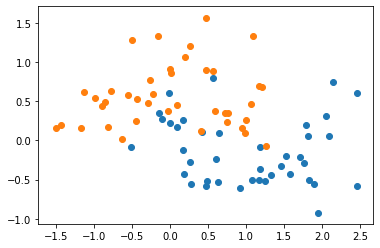

In [3]:
import numpy as np
import mystuff as ms
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

def blobs(N=40):
    X,y= make_moons(n_samples=2*N,noise=0.3, random_state=0)
    X = np.c_[np.ones(2*N),X[:,0],X[:,1]]
    y=2*y-1
    return X,y
        

N=40

X,y = blobs(N)
Xb = X[y==1]
Xr = X[y==-1]
plt.scatter(Xb[:,1],Xb[:,2])
plt.scatter(Xr[:,1],Xr[:,2])
plt.show()

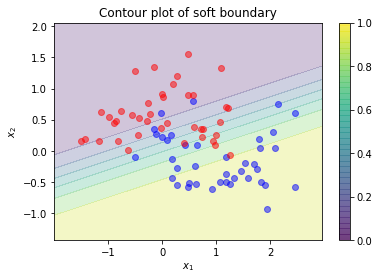

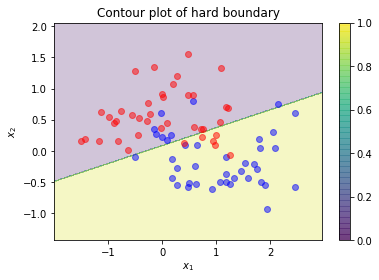

E_in(w) = 0.175


In [4]:

def E_in(X,y,w):
    mc = (np.sign(X.dot(w)) != y)
    return np.sum(mc)/len(mc)

w = np.zeros(X.shape[1])
w,path = ms.grad_descent(w,X,y,ms.fast_grad_lr,eta=0.1,max_iter=10000)


def sigmoid(array):
    """Applies the sigmoid or logistic function to a numpy array"""
    return 1/(1+np.exp(-array))


xmin = np.min(X[:,1])-0.5
xmax = np.max(X[:,1])+0.5
ymin = np.min(X[:,2])-0.5
ymax = np.max(X[:,2])+0.5
x1 = np.arange(xmin,xmax,0.01)
x2 = np.arange(ymin,ymax,0.01)

x1v,x2v = np.meshgrid(x1,x2)

varz = [np.ones_like(x1v),x1v,x2v]

z = np.zeros_like(x1v)
for ww,v in zip(w,varz):
    z += ww*v

zsoft = sigmoid(z)
#z = np.sign(z)
plt.contourf(x1v,x2v,zsoft,alpha=0.25)
Xg = X[y==1]
Xb = X[y==-1]

plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.title("Contour plot of soft boundary")
plt.colorbar()
plt.show()


zsoft = np.sign(z)
#z = np.sign(z)
plt.contourf(x1v,x2v,zsoft,alpha=0.25)
Xg = X[y==1]
Xb = X[y==-1]

plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.title("Contour plot of hard boundary")
plt.colorbar()
plt.show()


print("E_in(w) = {}".format(E_in(X,y,w)))
w_lin=w

### Fitting

We now use logistic regression to fit this data in a high dimensional space.


In [5]:
from sklearn.preprocessing import PolynomialFeatures
deg=5
pf = PolynomialFeatures(deg)
Z = pf.fit_transform(X[:,1:])
w = np.zeros(Z.shape[1])
w,path = ms.grad_descent(w,Z,y,ms.fast_grad_lr,eta=0.1,max_iter=20000)

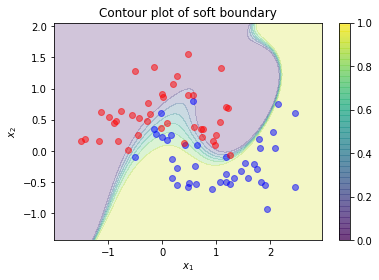

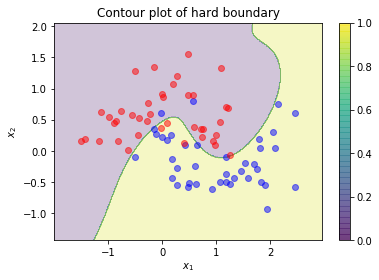

E_in(w) = 0.075


In [6]:
def sigmoid(array):
    """Applies the sigmoid or logistic function to a numpy array"""
    return 1/(1+np.exp(-array))


xmin = np.min(X[:,1])-0.5
xmax = np.max(X[:,1])+0.5
ymin = np.min(X[:,2])-0.5
ymax = np.max(X[:,2])+0.5
x1 = np.arange(xmin,xmax,0.01)
x2 = np.arange(ymin,ymax,0.01)

x1v,x2v = np.meshgrid(x1,x2)

varz = np.concatenate((x1v.reshape(-1,1),x2v.reshape(-1,1)),axis=1)
varzp = pf.fit_transform(varz)

z = (varzp.dot(w)).reshape(x1v.shape)

zsoft = sigmoid(z)
#z = np.sign(z)
plt.contourf(x1v,x2v,zsoft,alpha=0.25)
Xg = X[y==1]
Xb = X[y==-1]

plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.title("Contour plot of soft boundary")
plt.colorbar()
plt.show()


zsoft = np.sign(z)
#z = np.sign(z)
plt.contourf(x1v,x2v,zsoft,alpha=0.25)
Xg = X[y==1]
Xb = X[y==-1]

plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.title("Contour plot of hard boundary")
plt.colorbar()
plt.show()
print("E_in(w) = {}".format(E_in(Z,y,w)))

w_poly = w

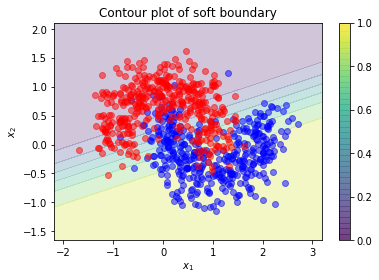

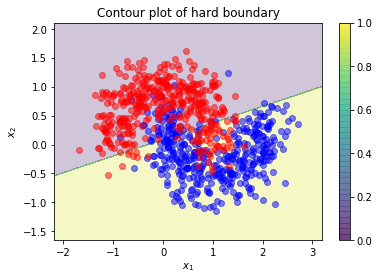

E_in(w) = 0.14875


In [7]:
X_original = np.copy(X)
y_original = np.copy(y)
X,y = blobs(N*10)
Z_original = np.copy(Z)
Z = pf.fit_transform(X[:,1:])


#w = np.zeros(X.shape[1])
#w,path = ms.grad_descent(w,X,y,ms.fast_grad_lr,eta=0.1,max_iter=10000)

w = w_lin

def sigmoid(array):
    """Applies the sigmoid or logistic function to a numpy array"""
    return 1/(1+np.exp(-array))


xmin = np.min(X[:,1])-0.5
xmax = np.max(X[:,1])+0.5
ymin = np.min(X[:,2])-0.5
ymax = np.max(X[:,2])+0.5
x1 = np.arange(xmin,xmax,0.01)
x2 = np.arange(ymin,ymax,0.01)

x1v,x2v = np.meshgrid(x1,x2)

varz = [np.ones_like(x1v),x1v,x2v]

z = np.zeros_like(x1v)
for ww,v in zip(w,varz):
    z += ww*v

zsoft = sigmoid(z)
#z = np.sign(z)
plt.contourf(x1v,x2v,zsoft,alpha=0.25)
Xg = X[y==1]
Xb = X[y==-1]

plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.title("Contour plot of soft boundary")
plt.colorbar()
plt.show()


zsoft = np.sign(z)
#z = np.sign(z)
plt.contourf(x1v,x2v,zsoft,alpha=0.25)
Xg = X[y==1]
Xb = X[y==-1]

plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.title("Contour plot of hard boundary")
plt.colorbar()
plt.show()


print("E_in(w) = {}".format(E_in(X,y,w)))


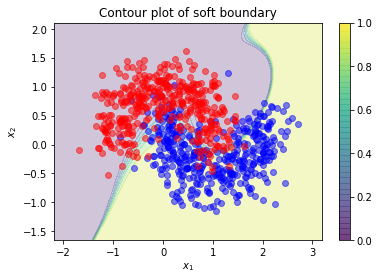

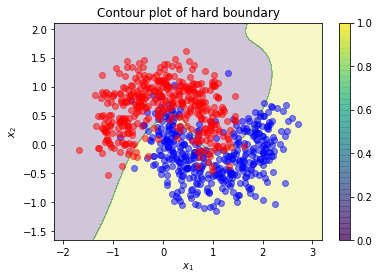

E_in(w) = 0.09625


In [8]:
w = w_poly



xmin = np.min(X[:,1])-0.5
xmax = np.max(X[:,1])+0.5
ymin = np.min(X[:,2])-0.5
ymax = np.max(X[:,2])+0.5
x1 = np.arange(xmin,xmax,0.01)
x2 = np.arange(ymin,ymax,0.01)

x1v,x2v = np.meshgrid(x1,x2)

varz = np.concatenate((x1v.reshape(-1,1),x2v.reshape(-1,1)),axis=1)
varzp = pf.fit_transform(varz)

z = (varzp.dot(w)).reshape(x1v.shape)

zsoft = sigmoid(z)
#z = np.sign(z)
plt.contourf(x1v,x2v,zsoft,alpha=0.25)
Xg = X[y==1]
Xb = X[y==-1]

plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.title("Contour plot of soft boundary")
plt.colorbar()
plt.show()


zsoft = np.sign(z)
#z = np.sign(z)
plt.contourf(x1v,x2v,zsoft,alpha=0.25)
Xg = X[y==1]
Xb = X[y==-1]

plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.title("Contour plot of hard boundary")
plt.colorbar()
plt.show()
print("E_in(w) = {}".format(E_in(Z,y,w)))


In [9]:


def grad_descent(w,X,y,gradient,alpha=0.001,eta=0.1,max_iter=1000):
    """ parameters: w, gradient
		optional: eta (default 0.1) max_iter (default 1000)
    """ 
    history=[]
    history.append(w)
    for i in range(max_iter):
        w = w-eta*gradient(w,X,y,alpha)
        history.append(w)
    return w,np.array(history)



In [10]:
import mystuff as ms

alpha = 1e-06


/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


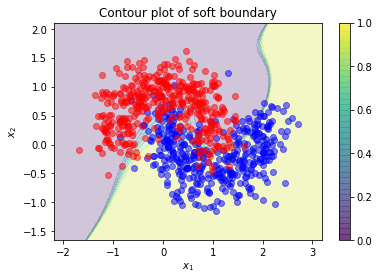

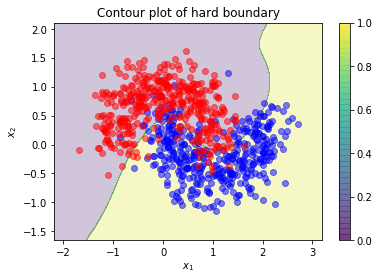

E_out(w) = 0.09875
alpha = 1e-05


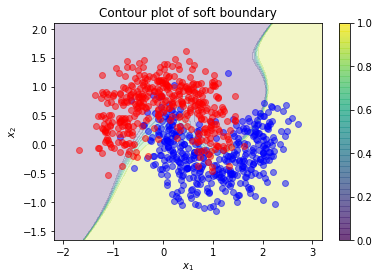

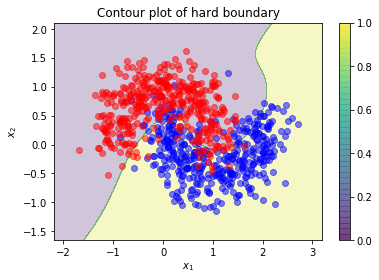

E_out(w) = 0.09875
alpha = 0.0001


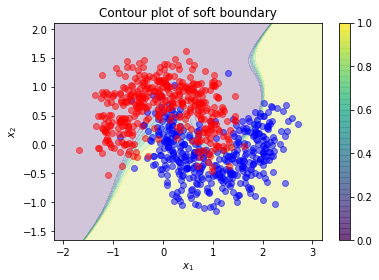

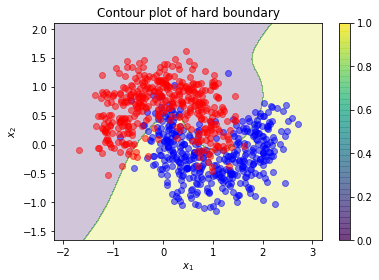

E_out(w) = 0.095
alpha = 0.001


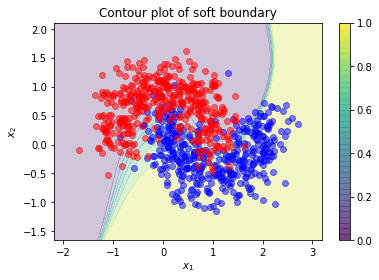

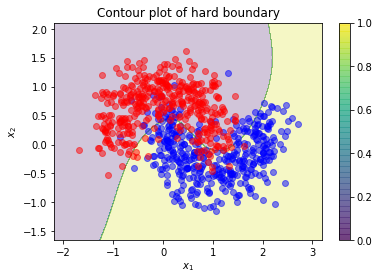

E_out(w) = 0.09625
alpha = 0.01


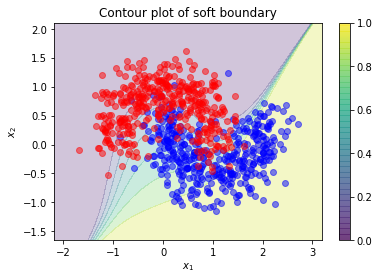

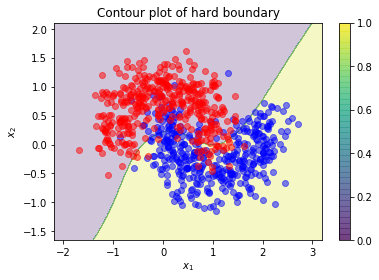

E_out(w) = 0.10875
alpha = 0.1


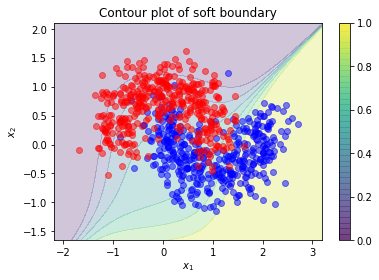

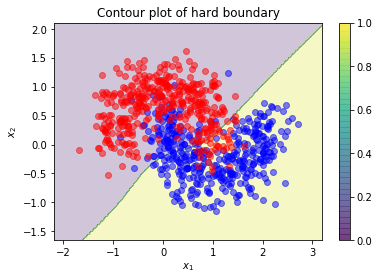

E_out(w) = 0.1625


In [11]:
for alpha in [10**k for k in [-6,-5,-4,-3,-2,-1]]:
    print("alpha = {}".format(alpha))
    w,path = grad_descent(w,Z_original,y_original,ms.reg_fast_grad_lr,alpha=alpha,eta=0.1,max_iter=20000)
    z = (varzp.dot(w)).reshape(x1v.shape)

    zsoft = sigmoid(z)
    #z = np.sign(z)
    plt.contourf(x1v,x2v,zsoft,alpha=0.25)
    Xg = X[y==1]
    Xb = X[y==-1]

    plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
    plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

    plt.title("Contour plot of soft boundary")
    plt.colorbar()
    plt.show()


    zsoft = np.sign(z)
    #z = np.sign(z)
    plt.contourf(x1v,x2v,zsoft,alpha=0.25)
    Xg = X[y==1]
    Xb = X[y==-1]

    plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
    plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

    plt.title("Contour plot of hard boundary")
    plt.colorbar()
    plt.show()
    print("E_out(w) = {}".format(E_in(Z,y,w)))

alpha = 0.0078125


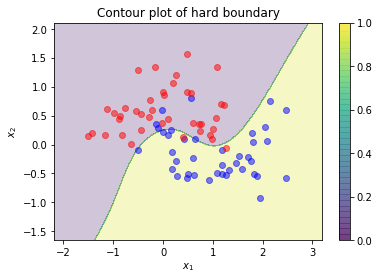

E_in(w) = 0.105
alpha = 0.015625


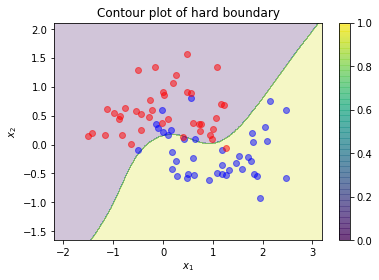

E_in(w) = 0.1175
alpha = 0.03125


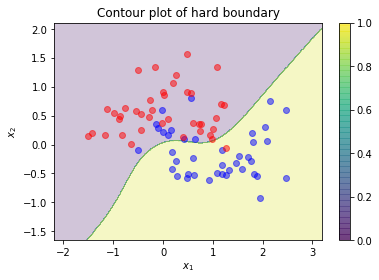

E_in(w) = 0.13
alpha = 0.0625


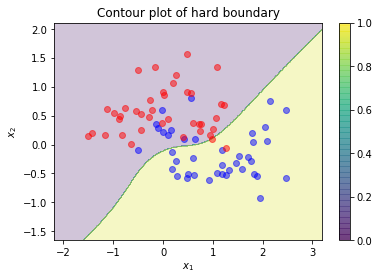

E_in(w) = 0.15125
alpha = 0.125


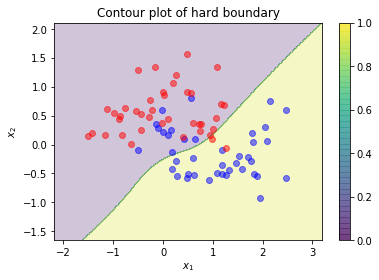

E_in(w) = 0.17
alpha = 0.25


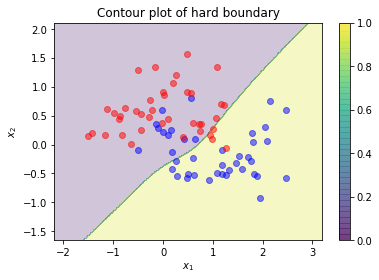

E_in(w) = 0.185
alpha = 0.5


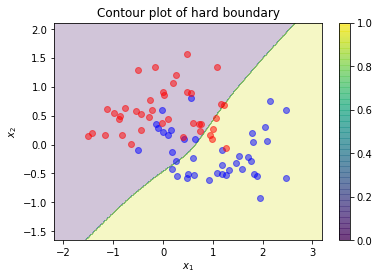

E_in(w) = 0.20875


In [13]:
for alpha in [2**k for k in [-7,-6,-5,-4,-3,-2,-1]]:
    print("alpha = {}".format(alpha))
    w,path = grad_descent(w,Z_original,y_original,ms.reg_fast_grad_lr,alpha=alpha,eta=0.1,max_iter=20000)
    z = (varzp.dot(w)).reshape(x1v.shape)




    zsoft = np.sign(z)
    #z = np.sign(z)
    plt.contourf(x1v,x2v,zsoft,alpha=0.25)
    Xg = X_original[y_original==1]
    Xb = X_original[y_original==-1]

    plt.scatter(Xg[:,1],Xg[:,2],c="b",alpha=0.5)
    plt.scatter(Xb[:,1],Xb[:,2],c='r',alpha=0.5)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

    plt.title("Contour plot of hard boundary")
    plt.colorbar()
    plt.show()
    print("E_in(w) = {}".format(E_in(Z,y,w)))